<a href="https://colab.research.google.com/github/pastrop/kaggle/blob/master/PandasAI_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas Capabilties Demo
This is a capabilitis demo using a small built-in LLM model. Laptop project Dayllight results are used. TL:DR: Potentially we can build a fully interactive Daylight UI allowing mining the resutls of Daylight Analysis in any way imaginable

In [1]:
%%capture
!pip install pandasai

# SmartDataframe

A SmartDataframe is a pandas (or polars) dataframe that inherits all the properties and methods from the `pd.DataFrame`, but also adds conversational features to it.

In [2]:
from pandasai import SmartDataframe

You can instantiate a dataframe importing from several different sources (pandas or polars dataframe, csv, xlsx or google sheets).

### Importing from a pandas dataframe

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/results_laptop_proj.csv')

In [5]:
df.head()

,concept,relevance,score_driver,rating,how much on average does mentioning this concept impact the final rating of a feedback,positive sentiment percentage,neutral sentiment percentage,negative sentiment percentage,positive_feedback,netral_feedback,negative_feedback,total_sentiment
0,laptop,1230.00000,Rating,4.148432,-0.314338,0.645296,0.154007,0.200697,926,221,288,1435
1,appearance,777.55102,Rating,4.929164,0.466394,0.905803,0.042954,0.051243,1202,57,68,1327
2,smooth,547.00000,Rating,4.845258,0.382488,0.971714,0.009983,0.018303,584,6,11,601
3,keyboard,538.00000,Rating,4.391557,-0.071213,0.669578,0.066958,0.263464,460,46,181,687
4,Packaging protection,513.00000,Rating,4.957115,0.494345,0.838207,0.066277,0.095517,430,34,49,513


In [6]:
import os

os.environ['PANDASAI_API_KEY'] = "API_KEY"

In [7]:
sdf = SmartDataframe(df)

You can now query it in natural language

In [10]:
sdf.chat("Which concepts have the highest relevance?")

'The concepts with relevance above 500 are: laptop, appearance, smooth, keyboard, Packaging protection, screen.'

In [14]:
sdf.chat("what concepts are rated above 4?")

'The concepts rated above 4 are: laptop, appearance, smooth, keyboard, Packaging protection, screen, packaging, computer, notebook, satisfied, gaming laptop, battery life, Alienware, bought, machine, configuration, graphics card, battery, recommend, Picture quality, AMD, Alien, boot, customer service, display, performance, handsome, graphics, fast, overall, desktop, CPU, logistics is fast, Running score evaluation, loud, texture, cool, gaming, software, GPU, workmanship, Running speed, Lenovo, speakers, upgrade, logistics, processor, brightness, mouse, bright, excellent, product, Jingdong, mode, PC, RAM, ports, temperature, runs smoothly, heat dissipation, thin and light, packaging is very good, suitable, comfortable, praise, specs, price, resolution, powerful, fan, color, arrived, ROG, switch, frames, noise, handle, brand, playing games, portable, download, quality, relatively, run, acceptable, savior, thin, touchpad, light, speed, installed, FPS, no lag, heat, interface, load, Great 

In [15]:
sdf.chat("what concepts have relevance above 400?")

'The concepts with relevance above 400 are: laptop, appearance, smooth, keyboard, Packaging protection, screen, packaging, computer, notebook.'

In [16]:
sdf.chat("what concepts are rated above 4 and have relevance above 400?")

,concept,relevance,rating
0,laptop,1230.000000,4.148432
1,appearance,777.551020,4.929164
2,smooth,547.000000,4.845258
3,keyboard,538.000000,4.391557
4,Packaging protection,513.000000,4.957115
5,screen,500.877984,4.288636
6,packaging,452.000000,4.854906
7,computer,428.437201,4.367950
8,notebook,410.000000,4.754678


from matplotlib import pyplot as plt
_df_0['relevance'].plot(kind='hist', bins=20, title='relevance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='relevance', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['relevance'].plot(kind='line', figsize=(8, 4), title='relevance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

### Plotting a chart

You can also use PandasAI to easily plot a chart

'/content/exports/charts/temp_chart.png'

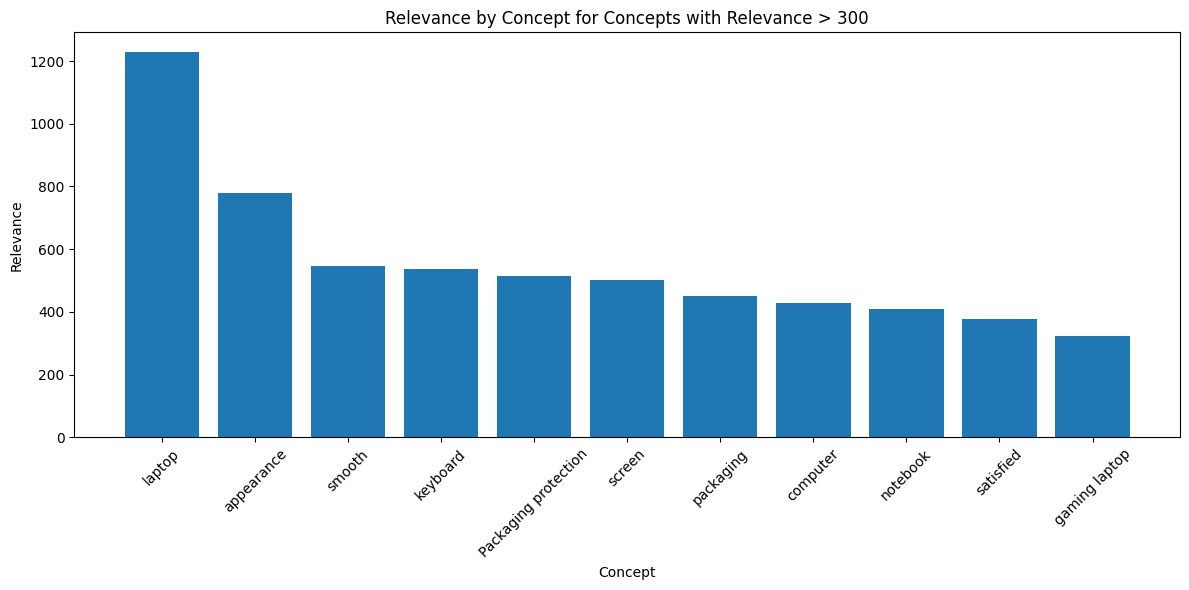

In [17]:
sdf.chat("Plot a chart of the relevance by concept for the concepts with the relenace above 300")

You can also provide additional instructions. For example, imagine you want to use different colors for each bar. You just need to ask to PandasAI:

'/content/exports/charts/temp_chart.png'

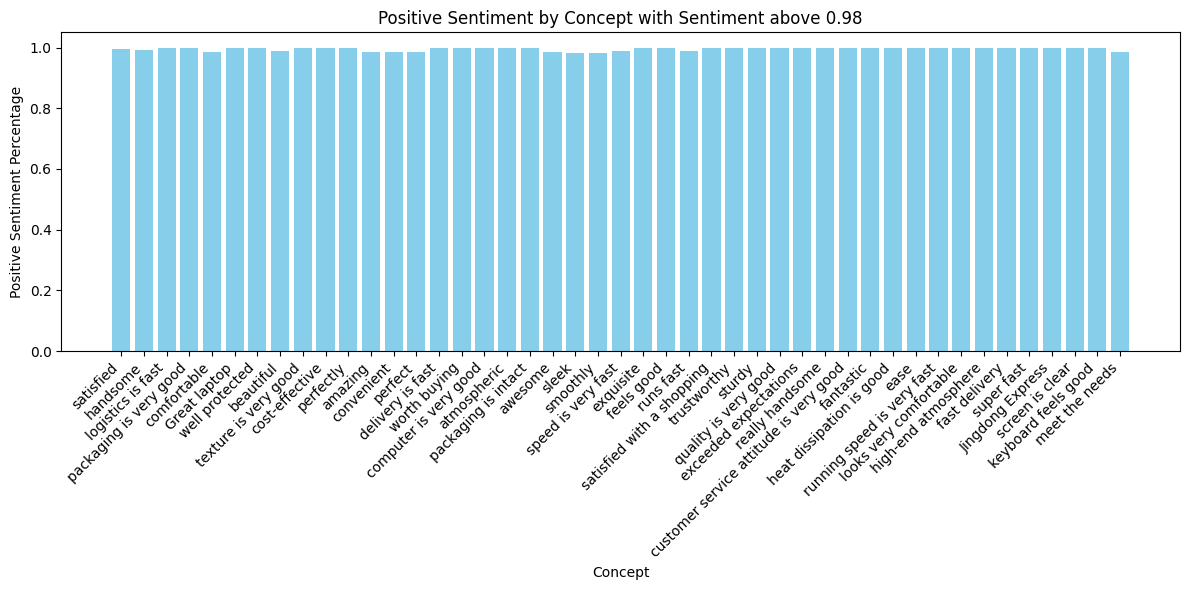

In [22]:
sdf.chat("Plot a chart of the positive sentiment by concept for the concepts with the positive sentiment above 0.98")

'/content/exports/charts/temp_chart.png'

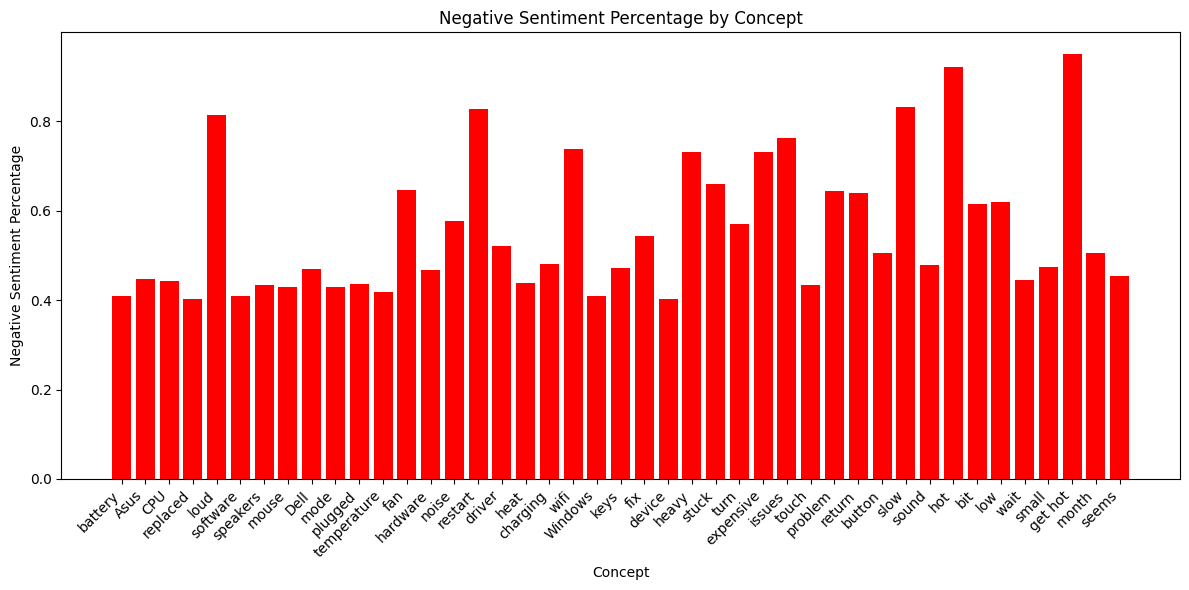

In [23]:
sdf.chat("Plot a chart of the negative sentiment by concept for the concepts with the negative sentiment above 0.4 mentioned in the 100 documents or more")


# Different LLMs

Although at the moment OpenAI GPT3.5 and GPT4 are the recommended models, we also support other models, like AzureOpenAI.

You can use them as if follows:

In [22]:
from pandasai import SmartDataframe
from pandasai.llm import OpenAI
#from pandasai.llm import AzureOpenAI
#from pandasai.llm import GoogleVertexAI

#openai_llm = OpenAI(
    #api_token="XXX")


In [34]:
sdf_openAI = SmartDataframe(df, config={"llm": openai_llm})

In [35]:
sdf_openAI.chat("Which concepts have the highest relevance?")

{'type': 'string', 'value': "The concept with the highest relevance is 'laptop' with a relevance score of 1230.0."}


"The concept with the highest relevance is 'laptop' with a relevance score of 1230.0."

In [36]:
sdf_openAI.chat("give me 5 concepts have the highest relevance")

{'type': 'dataframe', 'value':                 concept   relevance
0                laptop  1230.00000
1            appearance   777.55102
2                smooth   547.00000
3              keyboard   538.00000
4  Packaging protection   513.00000}


,concept,relevance
0,laptop,1230.00000
1,appearance,777.55102
2,smooth,547.00000
3,keyboard,538.00000
4,Packaging protection,513.00000


In [37]:
sdf_openAI.chat("Which 10 concepts have the highest positive sentiment?")

,concept,relevance,score_driver,rating,how much on average does mentioning this concept impact the final rating of a feedback,positive sentiment percentage,neutral sentiment percentage,negative sentiment percentage,positive_feedback,netral_feedback,negative_feedback,total_sentiment
442,high-end atmosphere,32.000000,Rating,4.968750,0.505980,1.0,0.0,0.0,32,0,0,32
472,screen is clear,30.458090,Rating,4.920000,0.457230,1.0,0.0,0.0,50,0,0,50
266,satisfied with a shopping,46.000000,Rating,5.000000,0.537230,1.0,0.0,0.0,46,0,0,46
487,keyboard feels good,30.000000,Rating,4.838710,0.375940,1.0,0.0,0.0,31,0,0,31
415,running speed is very fast,33.735452,Rating,5.000000,0.537230,1.0,0.0,0.0,46,0,0,46
302,trustworthy,43.000000,Rating,5.000000,0.537230,1.0,0.0,0.0,43,0,0,43
123,well protected,77.388535,Rating,4.987654,0.524884,1.0,0.0,0.0,81,0,0,81
179,worth buying,61.415267,Rating,5.000000,0.537230,1.0,0.0,0.0,84,0,0,84
463,Jingdong Express,31.000000,Rating,5.000000,0.537230,1.0,0.0,0.0,31,0,0,31
108,Great laptop,89.000000,Rating,4.584270,0.121500,1.0,0.0,0.0,89,0,0,89


In [38]:
sdf_openAI.chat("give me 10 comcepts with the highest number of positive feedbacks")

{'type': 'dataframe', 'value':         concept  positive_feedback
133        good               3472
31         fast               1250
1    appearance               1202
41       gaming               1161
89      quality               1067
128         use               1051
402       great               1012
91          run                975
7      computer                960
0        laptop                926}


,concept,positive_feedback
133,good,3472
31,fast,1250
1,appearance,1202
41,gaming,1161
89,quality,1067
128,use,1051
402,great,1012
91,run,975
7,computer,960
0,laptop,926


In [39]:
sdf_openAI.chat("Give me number of positive feedbacks for 10 concepts with the highest positive sentiment")

{'type': 'dataframe', 'value':                         concept  positive_feedback
442         high-end atmosphere                 32
472             screen is clear                 50
266   satisfied with a shopping                 46
487         keyboard feels good                 31
415  running speed is very fast                 46
302                 trustworthy                 43
123              well protected                 81
179                worth buying                 84
463            Jingdong Express                 31
108                Great laptop                 89}


,concept,positive_feedback
442,high-end atmosphere,32
472,screen is clear,50
266,satisfied with a shopping,46
487,keyboard feels good,31
415,running speed is very fast,46
302,trustworthy,43
123,well protected,81
179,worth buying,84
463,Jingdong Express,31
108,Great laptop,89


In [ ]:
#from pandasai.llm import AzureOpenAI
#from pandasai.llm import GoogleVertexAI
azure_llm = AzureOpenAI(
    api_token="my-azure-openai-api-key",
    azure_endpoint="my-azure-openai-api-endpoint",
    api_version="2023-05-15",
    deployment_name="my-deployment-name"
)

vertexai_llm = GoogleVertexAI(
  project_id="generative-ai-training",
  location="us-central1",
  model="text-bison@001"
)

df1 = SmartDataframe(df, config={"llm": openai_llm})
df2 = SmartDataframe(df, config={"llm": azure_llm})
df3 = SmartDataframe(df, config={"llm": vertexai_llm})

print(df1.chat("Which country has the highest GDP?"))
print(df2.chat("Which one is the unhappiest country?"))
print(df3.chat("What is the sum of the GDP of the 2 unhappiest countries?"))

## LangChain LLMs

In some cases, you might want to use LangChain LLMs instead.

In [ ]:
!pip install pandasai[langchain]

Then you can use them as if they were PandasAI LLMs.

In [ ]:
from pandasai import SmartDataframe
from langchain.llms import OpenAI
# from langchain.llms import Anthropic
# from langchain.llms import LlamaCpp

langchain_llm = OpenAI(openai_api_key="YOUR TOKEN", max_tokens=1000)
langchain_sdf = SmartDataframe(df, config={"llm": langchain_llm})
langchain_sdf.chat("Which are the top 5 countries by GPD?")

,country,gdp,happiness_index
0,United States,19294482071552,6.94
9,China,14631844184064,5.12
8,Japan,4380756541440,5.87
3,Germany,3435817336832,7.07
1,United Kingdom,2891615567872,7.16


# Datalake

In [ ]:
from pandasai import SmartDatalake

In [ ]:
#the dataframes are merged by ID
employees_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Name": ["John", "Emma", "Liam", "Olivia", "William"],
        "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
    }
)

salaries_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Salary": [5000, 6000, 4500, 7000, 5500],
    }
)

lake = SmartDatalake([employees_df, salaries_df])
lake.chat("What's the name of the employee that gets paid the most?")
#test print below
#print(lake.last_code_executed)

In this case we provided for each df a table name, so that the LLM has some context and can better perform the joins. As you can see on the example below, it succeeded at figuring out the right join to do. In fact, the user "John" has actually 2 photos.

In [ ]:
users_df = pd.DataFrame(
    {
        "id": [1, 2, 3, 4, 5],
        "name": ["John", "Emma", "Liam", "Olivia", "William"]
    }
)
users = SmartDataframe(users_df, name="users")

photos_df = pd.DataFrame(
    {
        "id": [31, 32, 33, 34, 35],
        "user_id": [1, 1, 2, 4, 5]
    }
)
photos = SmartDataframe(photos_df, name="photos")

lake = SmartDatalake([users, photos])
lake.chat("How many photos has been uploaded by John?")

# Connectors

PandasAI provides a number of connectors that allow you to connect to different data sources. These connectors are designed to be easy to use, even if you are not familiar with the data source or with PandasAI.

To use a connector, you first need to install the required dependencies. You can do this by running the following command:

In [ ]:
!pip install pandasai[connectors]

In [ ]:
from pandasai.connectors import MySQLConnector, PostgreSQLConnector

# With a MySQL database
loan_connector = MySQLConnector(
    config={
        "host": "localhost",
        "port": 3306,
        "database": "mydb",
        "username": "root",
        "password": "root",
        "table": "loans",
        "where": [
            # this is optional and filters the data to
            # reduce the size of the dataframe
            ["loan_status", "=", "PAIDOFF"],
        ],
    }
)

# With a PostgreSQL database
payment_connector = PostgreSQLConnector(
    config={
        "host": "localhost",
        "port": 5432,
        "database": "mydb",
        "username": "root",
        "password": "root",
        "table": "payments",
        "where": [
            # this is optional and filters the data to
            # reduce the size of the dataframe
            ["payment_status", "=", "PAIDOFF"],
        ],
    }
)

df_connector = SmartDatalake([loan_connector, payment_connector])
response = df_connector.chat("How many loans from the United states?")
print(response)

In [ ]:
from pandasai.connectors.yahoo_finance import YahooFinanceConnector
from pandasai import SmartDataframe

yahoo_connector = YahooFinanceConnector("NVDA")
df = SmartDataframe(yahoo_connector)

response = df.chat("What is the closing price for yesterday?")
print(response)

In [ ]:
yahoo_connector = YahooFinanceConnector("NVDA")

df_connector = SmartDataframe(yahoo_connector)
response = df_connector.chat("Plot the chart of the stock")

# Agent

The agent is very similar to the SmartDatalake, as it accepts multiple dataframes or connectors. However, it comes with a memory, therefore can be used for multi-turn conversation.

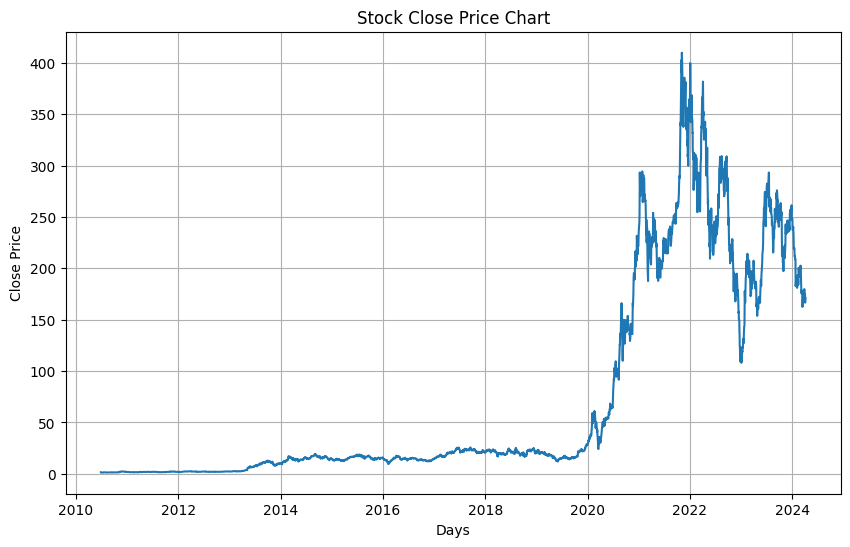

In [ ]:
from pandasai import Agent

yahoo_connector = YahooFinanceConnector("TSLA")

agent = Agent(yahoo_connector)
response = agent.chat("Plot the chart of the stock close price")

Now let's try with a follow up question

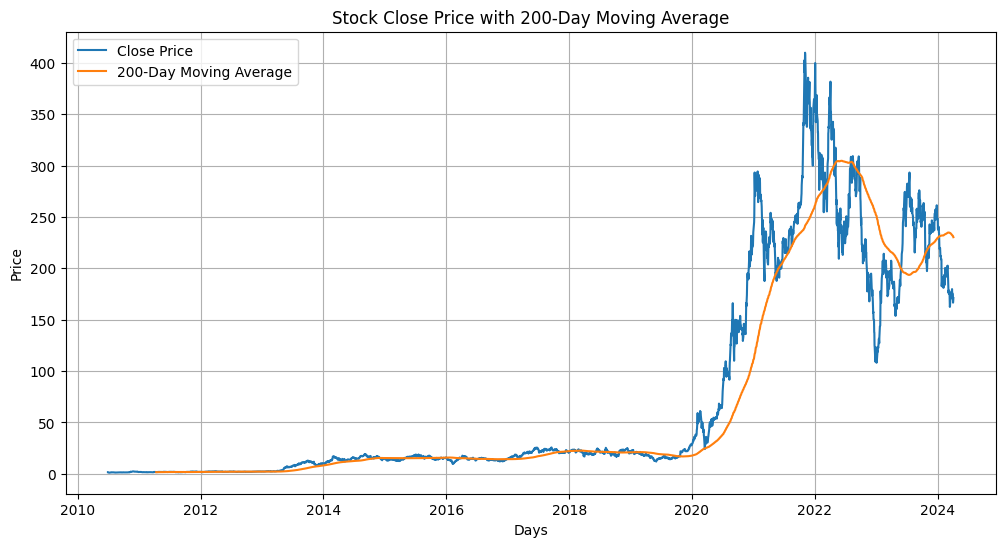

In [ ]:
result = agent.chat("Can you add the moving average at 200 days?")

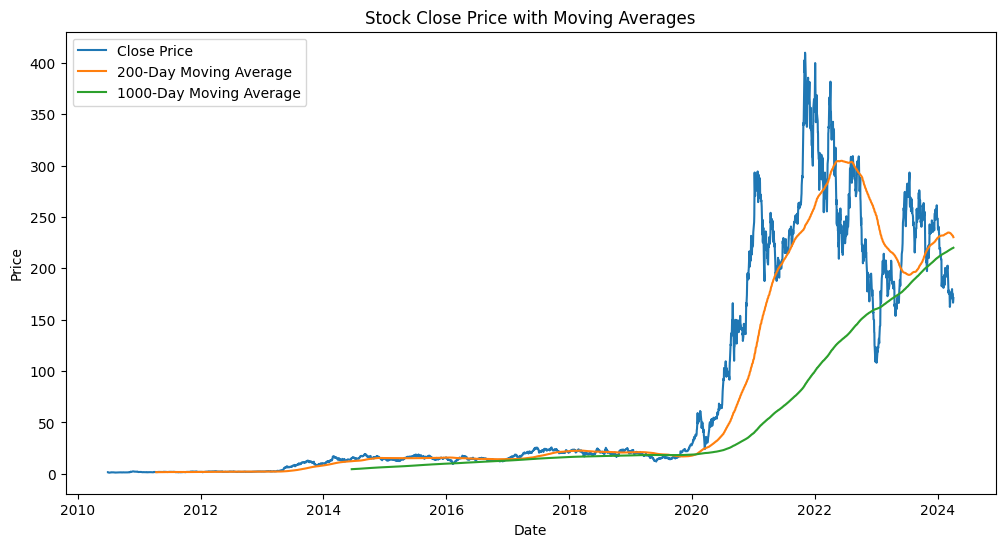

In [ ]:
result = agent.chat("Can you also add the moving average at 1000 days?")

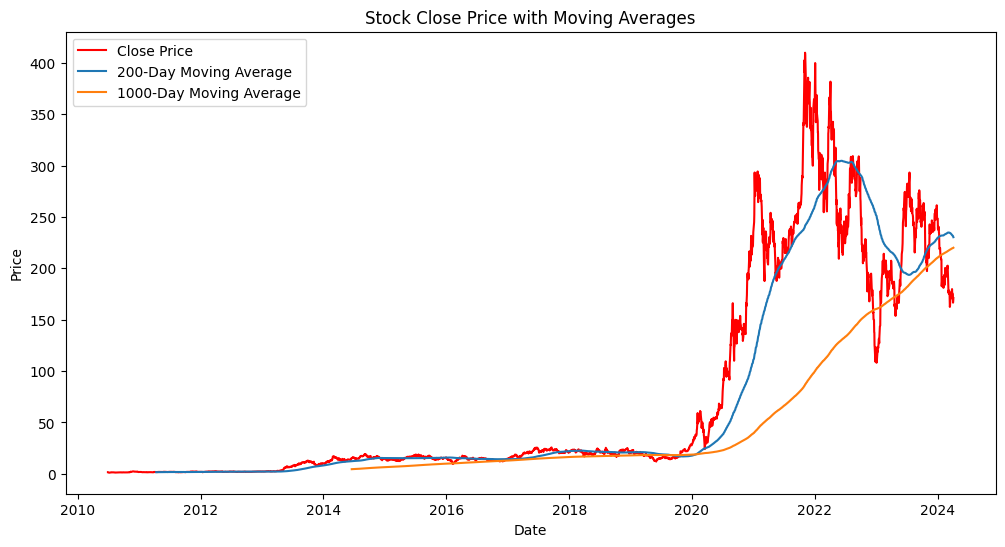

In [ ]:
result = agent.chat("Can you make the price line red?")

You can find more info about the connectors (and many more connectors) here: https://docs.pandas-ai.com/en/latest/connectors/

# Train PandasAI
You can train PandasAI to understand your data better and to improve its performance. Training is as easy as calling the `train` method on the `SmartDataframe`, `SmartDatalake` or `Agent`.

There are two kinds of training:

- instructions training
- q/a training

## Instructions training

Instructions training is used to teach PandasAI how you expect it to respond to certain queries. You can provide generic instructions about how you expect the model to approach certain types of queries, and PandasAI will use these instructions to generate responses to similar queries.

For example, you might want the LLM to be aware that your company's fiscal year starts in April, or about specific ways you want to handle missing data. Or you might want to teach it about specific business rules or data analysis best practices that are specific to your organization.

To train PandasAI with instructions, you can use the `train` method on the `Agent`, `SmartDataframe` or `SmartDatalake`, as it follows.

** NOTE **: You can get your API KEY from https://PandaBI.ai

In [ ]:
import os

os.environ["PANDASAI_API_KEY"] = "YOUR_PANDASAI_API_KEY"

In [ ]:
from pandasai import Agent
from pandasai.llm import OpenAI

llm = OpenAI()

agent = Agent(df)
agent.train(docs="Exclude the US from the highest GDP")

In [ ]:
response = agent.chat("Which country has the highest GDP?")
print(response)

The country with the highest GDP (excluding the US) is China.


## Q/A training

Q/A training is used to teach PandasAI the desired process to answer specific questions, enhancing the model's performance and determinism. One of the biggest challenges with LLMs is that they are not deterministic, meaning that the same question can produce different answers at different times. Q/A training can help to mitigate this issue.

To train PandasAI with Q/A, you can use the `train` method on the `Agent`, `SmartDataframe` or `SmartDatalake`, as it follows:

In [ ]:
# Train the model
query = "What are the top 5 countries by GDP?"
response = """
import pandas as pd

df = dfs[0]

# Convert GDP column to numeric values
df['gdp'] = pd.to_numeric(df['gdp'])

# Sort the DataFrame by GDP in descending order
sorted_df = df.sort_values(by='gdp', ascending=False)

# Get the top 5 countries by GDP
top_5_countries = sorted_df.head(5)

# Declare result variable
result = {
    "type": "dataframe",
    "value": top_5_countries
}
"""
agent.train(queries=[query], codes=[response])

In [ ]:
response = agent.chat("List the top 10 countries by GDP")
print(response)
print(agent.last_code_generated)

          country             gdp  happiness_index
9           China  14631844184064             5.12
8           Japan   4380756541440             5.87
3         Germany   3435817336832             7.07
1  United Kingdom   2891615567872             7.16
2          France   2411255037952             6.66
4           Italy   1745433788416             6.38
6          Canada   1607402389504             7.23
7       Australia   1490967855104             7.22
5           Spain   1181205135360             6.40
# TODO: import the required dependencies
import pandas as pd

df = dfs[0]

# Convert GDP column to numeric values
df['gdp'] = pd.to_numeric(df['gdp'])

# Sort the DataFrame by GDP in descending order
sorted_df = df.sort_values(by='gdp', ascending=False)

# Get the top 10 countries by GDP (excluding the US)
top_10_countries = sorted_df[sorted_df['country'] != 'United States'].head(10)

# Declare result variable
result = {
    "type": "dataframe",
    "value": top_10_countries
}
